<a href="https://colab.research.google.com/github/EfrainHernandezCortes/EDP2/blob/main/M%C3%A9todo_de_Galerkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Método de Galerkin

In [31]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

Se importan las librerías necesarias.

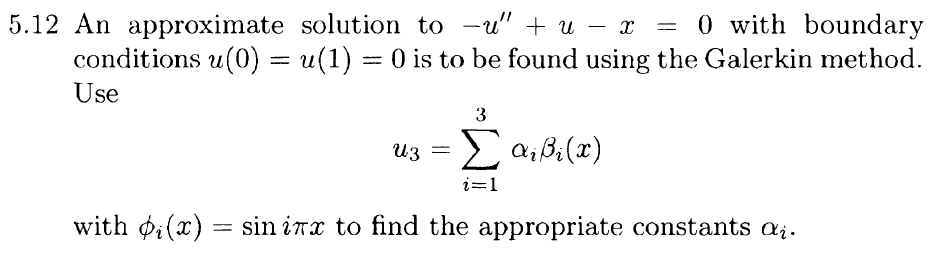

In [32]:
x = sp.symbols('x') # Introducimos una variable
u = sp.Function('u') # Esto es una función

In [33]:
ode = -u(x).diff(x, x) + u(x) - x
ode

-x + u(x) - Derivative(u(x), (x, 2))

Resolvemos la ecuación.

In [34]:
sp.dsolve(ode, u(x))

Eq(u(x), C1*exp(-x) + C2*exp(x) + x)

Condiciones para la solución exacta.

In [35]:
sol = sp.dsolve(ode, ics={u(0): 0, u(1): 0})
sol

Eq(u(x), x - E*exp(x)/(-1 + exp(2)) + E*exp(-x)/(-1 + exp(2)))

Se muestra la gráfica.

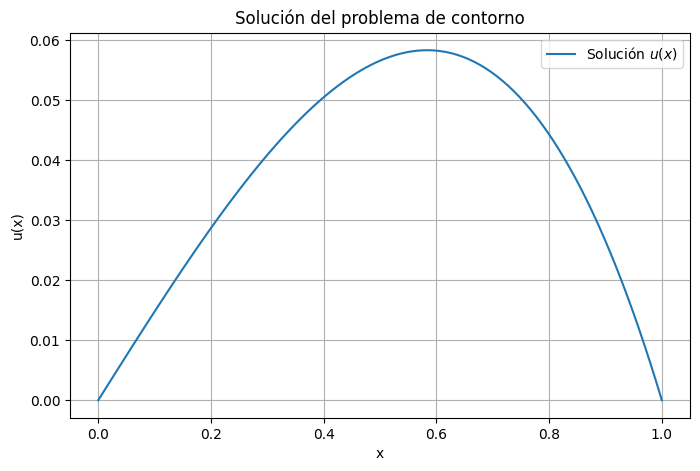

In [36]:
u_expr = sol.rhs # Convertimos en un arreglo de numpy
u_num = sp.lambdify(x, u_expr, "numpy")
xx = np.linspace(0, 1, 100) #Valores aleatorios entre 0 y 1
yy = u_num(xx) #Se evalúa en la función

plt.figure(figsize=(8,5))
plt.plot(xx, yy, label="Solución $u(x)$")
plt.title("Solución del problema de contorno")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

Inicia el método de Galerkin

Se propone la función de prueba:


In [37]:
x = sp.symbols('x') #Introducimos la variable
N = 3  # Número de funciones base

Se construye la función base:

In [38]:
phi = []
for i in range(N):
  phi.append(sp.sin((i+1)*sp.pi*x))
alpha = sp.symbols('alpha1:'+str(N+1))

La aproximación:

In [39]:
u3 = sum(alpha[i] * phi[i] for i in range(N))
u3

alpha1*sin(pi*x) + alpha2*sin(2*pi*x) + alpha3*sin(3*pi*x)

El residuo:

In [40]:
residuo = -sp.diff(u3, x, 2) + u3 - x

Se crea un lista que se llenará al aplicar el método de Malerkin:

In [41]:
eqs = []
for j in range(N):
    eq = sp.integrate(residuo * phi[j], (x, 0, 1))
    eqs.append(sp.simplify(eq))

Se resuelven las ecuaciones para encontrar los valores de $$\alpha_i$$

In [42]:
sol1 = sp.solve(eqs, alpha)

Sustituyendo en u_3:

In [43]:
u3_sol = sp.simplify(u3.subs(sol1))
u3_sol

2*sin(pi*x)/(pi + pi**3) - sin(2*pi*x)/(pi + 4*pi**3) + 2*sin(3*pi*x)/(3*pi + 27*pi**3)

Gráfica de la solución aproximada en comparación con la solución exacta.

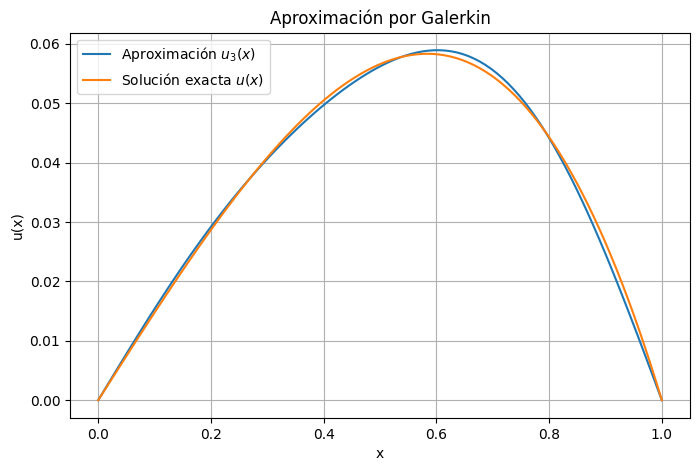

In [44]:
#Convertimos a un arreglo
u3_num = sp.lambdify(x, u3_sol, 'numpy')
x_vals = np.linspace(0, 1, 100) #Valores aleatorios entre 0 y 1
y_vals = u3_num(x_vals) #Sustitución

plt.figure(figsize=(8,5))
plt.plot(x_vals, y_vals, label="Aproximación $u_3(x)$")
plt.plot(xx, yy, label="Solución exacta $u(x)$")
plt.legend()
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Aproximación por Galerkin")
plt.grid(True)
plt.show()

Gráfica del error de la aproximación.

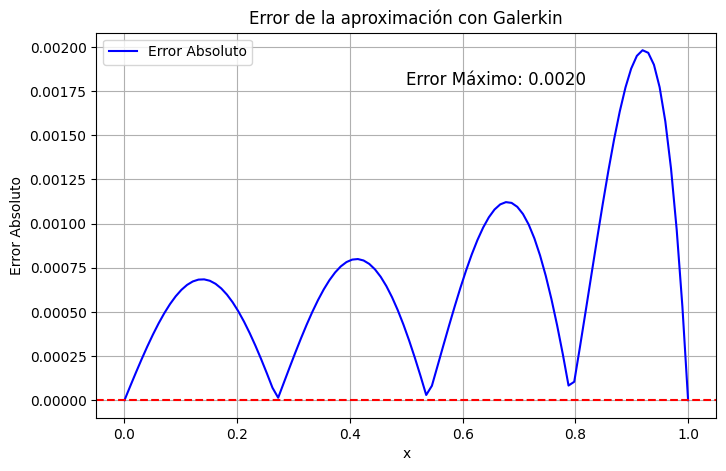

In [45]:
E_abs = np.abs(yy - y_vals) #Rango completo (xx)
plt.figure(figsize=(8, 5))
plt.plot(xx, E_abs, label=r'Error Absoluto', color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Error de la aproximación con Galerkin')
plt.xlabel('x')
plt.ylabel('Error Absoluto')
plt.grid(True)
plt.legend()
error_max = np.max(E_abs)
plt.annotate(f'Error Máximo: {error_max:.4f}',
             xy=(0.5, error_max * 0.9),
             xytext=(0.5, error_max * 0.9),
             fontsize=12)
plt.show()